In [2]:
#Usual inputs
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

%matplotlib inline

from IPython.display import Image, display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


sns.set(font_scale=1.2)#make fonts 20% larger
sns.set_style("whitegrid")#white background


# In class 0: Read and plot

In [ ]:
# Read file "data/world_bank_data.tsv" 
df = pd.read_csv("data/world_bank_data.tsv",sep="\t")

#Keep Italy and Sweden, and years 2005 and 2010 (more on this later in the day)
df_subset = df.loc[(df["Country"].isin(["ES","DE"])) & (df["Year"].isin([2005,2010]))]

#Show the head (first 5 lines)
df.head()

In [ ]:
#Create a scatter plot of green area vs co2_pc for teh dataframe df_subset with the following characteristix:
#should be square (aspect=1)
#4 inches of height
#dots should be 100 points wide

sns.relplot(x="GREEN_AREA_PC", y="CO2_PC",hue="Country", data=df_subset, kind="scatter", 
                aspect=1,height=4,s=100)

#Make the x axis in log scale
plt.xscale("log")

# Add better (more descriptive) lables
plt.xlabel("Green area per capita")
plt.ylabel("CO2 per capita")

#Remove the vertical lines, keeping only the horizontal ones
plt.gca().grid(axis='x') 

#Save the figure with the name "figures/myexample.pdf"
plt.savefig("figures/myexample.pdf") 

## In class 1: CONCAT
Concat df1 and df2

In [2]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2003,4],[2004,3]],columns=["year","count"])
display(df1)
display(df2)

#Concat both files and shiw the resulting table
df = pd.concat([df1,df2])
df

,year,count
0,2001,2
1,2002,3


,year,count
0,2003,4
1,2004,3


,year,count
0,2001,2
1,2002,3
0,2003,4
1,2004,3


## In class 2: MERGE INNER (default)
Inner (default) merge df1 and df2

In [3]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Inner merge both files and show the resulting table
df = pd.merge(df1,df2) #on="year" and how="inner" are optional
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2,Mexico


## In class 3: MERGE OUTER 
Outer merge df1 and df2

In [4]:
df1 = pd.DataFrame([[2001,2],[2002,3]],columns=["year","count"])
df2 = pd.DataFrame([[2001,"Mexico"],[2003,"China"]],columns=["year","place"])
display(df1)
display(df2)

#Outer merge both files  and show the resulting table
df = pd.merge(df1,df2,how="outer")
df

,year,count
0,2001,2
1,2002,3


,year,place
0,2001,Mexico
1,2003,China


,year,count,place
0,2001,2.0,Mexico
1,2002,3.0,NaN
2,2003,NaN,China


## In class 4: MELT
This dataset has variables in the column names, you'll need to melt it to have a nice, tidy dataset

In [5]:
df1 = pd.DataFrame([["Mexico",2,3,4],["China",22,12,3]],columns=["place","2000","2001","2002"])
df1


,place,2000,2001,2002
0,Mexico,2,3,4
1,China,22,12,3


In [6]:
#Variables present in columns already
variables_already_presents = ["place"]

#Variables to combine in on
columns_combine = ["2000","2001","2002"]

#Fix
melted_df1 = pd.melt(df1,id_vars=variables_already_presents,
           value_vars=columns_combine,
           var_name="Year",
           value_name="count")

#Convert the Year variable to numeric
melted_df1["Year"]  = melted_df1["Year"].astype(int)

#Print
melted_df1

,place,Year,count
0,Mexico,2000,2
1,China,2000,22
2,Mexico,2001,3
3,China,2001,12
4,Mexico,2002,4
5,China,2002,3


## In class 5: PIVOT
This dataset has several variables in one column, you'll need to pivot it to have a nice, tidy dataset

In [11]:
df1 = pd.DataFrame([["Mexico",2000,"temperature","25"],["Mexico",2001,"temperature","30"],["Mexico",2002,"temperature","35"],
                    ["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"],["Mexico",2000,"humidity","25"]],
                   columns=["place","year","variable","value"])
df1

,place,year,variable,value
0,Mexico,2000,temperature,25
1,Mexico,2001,temperature,30
2,Mexico,2002,temperature,35
3,Mexico,2000,humidity,25
4,Mexico,2000,humidity,25
5,Mexico,2000,humidity,25


In [12]:
df1["value"] = df1["value"].astype(int)

#Columns already present
variables_already_present = ["place","year"]

#Column with the variables
column_to_split = ["variable"]

#Column with the values
column_with_values = "value"

#Fix
pivoted_df1 = df1.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index()

pivoted_df1

variable,place,year,humidity,temperature
0,Mexico,2000,25.0,25.0
1,Mexico,2001,NaN,30.0
2,Mexico,2002,NaN,35.0


## In class 6: SCATTER + logarithmic variables
The file "data/revenue_marketCap.csv" has data on revenue and market capitalization for US publicly listed companies
- Read the file
- Plot the distributions of revenue and marketCap (sns.distplot())
- Transform the variables (take the log10)
- Fix the infinity values
- Make a scatter plot of Revenue vs MarketCap by Exchange

In [3]:
#Read the file
us_listed = pd.read_csv("./data/revenue_marketCap.csv",sep="\t")
us_listed.head()

,Revenue,MarketCap,Exchange
0,7500000.0,13123024.0,New York Stock Exchange (NYSE)
1,7500000.0,16739323.0,New York Stock Exchange (NYSE)
2,350000.0,43392.0,New York Stock Exchange (NYSE)
3,350000.0,26674.0,NASDAQ National Market
4,93750.0,48840.0,NASDAQ National Market


Text(0, 0.5, 'Frequency')

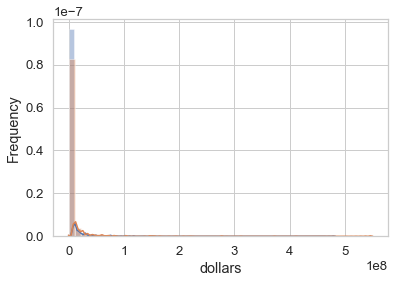

In [9]:
#Plot the distributions of revenue and marketcap and label the plots
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(us_listed["Revenue"])
sns.distplot(us_listed["MarketCap"])
plt.xlabel("dollars")
plt.ylabel("Frequency")

In [10]:
#TRansform both variables
us_listed["log_Revenue"] = np.log10(us_listed["Revenue"])
us_listed["log_MarketCap"] = np.log10(us_listed["MarketCap"])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
#Fix the infinity values
us_listed = us_listed.replace([np.inf,-np.inf],np.nan)#log(0) = infinity, we're basically discarding the rows with 0 dollars
us_listed = us_listed.dropna()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

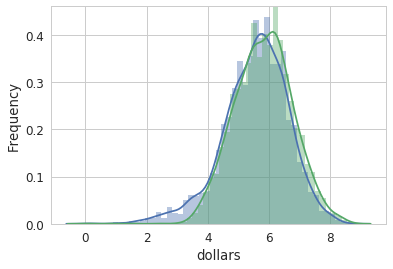

In [20]:
#Plot the distributions of revenue and marketcap and label the plots
#Take a look at http://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(us_listed["log_Revenue"])
sns.distplot(us_listed["log_MarketCap"])
plt.xlabel("dollars")
plt.ylabel("Frequency")

/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


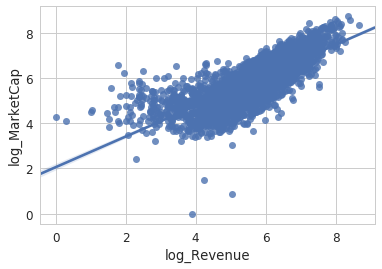

In [21]:
sns.regplot(x="log_Revenue",y="log_MarketCap",data=us_listed)

## In class 7: GROUPBY stock market exchange  and calculate descriptive statistics
- Summary statisics (describe)
- Correlation matrix (corr)
- Median value

In [ ]:
#Read the file
us_listed = pd.read_csv("./data/revenue_marketCap.csv",sep="\t")
us_listed.head()

In [6]:
#Groupby by "Exchange" and describe
us_listed.groupby("Exchange").describe()

Revenue                                        \
                                 count          mean           std       min   
Exchange                                                                       
NASDAQ National Market          2122.0  1.404546e+06  8.175416e+06  -37572.0   
NASDAQ/NMS (Global Market)         1.0  7.813000e+03           NaN    7813.0   
NYSE ARCA                          1.0  6.576340e+05           NaN  657634.0   
NYSE MKT                         201.0  1.446127e+05  4.813782e+05       0.0   
New York Stock Exchange (NYSE)  1512.0  6.809412e+06  2.124570e+07       0.0   

                                                                              \
                                      25%        50%        75%          max   
Exchange                                                                       
NASDAQ National Market           28950.75   139238.0   625615.0  233715000.0   
NASDAQ/NMS (Global Market)        7813.00     7813.0     7813.0       7813.0   
NYSE ARCA                       657634.00   657634.0   657634.0     657634.0   
NYSE MKT                          6164.00    26832.0    99121.0    5594000.0   
New York Stock Exchange (NYSE)  535898.75  1638175.0  4930506.0  482130000.0   

                               MarketCap                              \
                                   count          mean           std   
Exchange                                                               
NASDAQ National Market            2122.0  3.061470e+06  2.043784e+07   
NASDAQ/NMS (Global Market)           1.0  1.000000e+00           NaN   
NYSE ARCA                            1.0  7.117250e+05           NaN   
NYSE MKT                           201.0  2.211391e+05  7.255733e+05   
New York Stock Exchange (NYSE)    1512.0  1.007483e+07  2.798167e+07   

                                                                            \
                                     min        25%        50%         75%   
Exchange                                                                     
NASDAQ National Market               0.0   81254.25   290721.0  1110700.75   
NASDAQ/NMS (Global Market)           1.0       1.00        1.0        1.00   
NYSE ARCA                       711725.0  711725.00   711725.0   711725.00   
NYSE MKT                          1059.0   18728.00    44381.0   144031.00   
New York Stock Exchange (NYSE)       0.0  743829.00  2295049.0  7313249.25   

                                             
                                        max  
Exchange                                     
NASDAQ National Market          549659590.0  
NASDAQ/NMS (Global Market)              1.0  
NYSE ARCA                          711725.0  
NYSE MKT                          7717435.0  
New York Stock Exchange (NYSE)  373236497.0

## In class 8: GROUPBY stock market exchange  and calculate descriptive statistics
- Summary statisics (describe)
- Correlation matrix (corr)
- Median value

In [8]:
us_listed.head(100)
sns.regplot(x="log_Revenue",y="log_MarketCap",data=us_listed)

KeyError: 'log_Revenue'